In [2]:
import pandas
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

In [3]:
wines=pandas.read_csv('winemag-data_first150k.csv')


## 一、数据可视化摘要
### 1.1 数据集摘要
这是关于葡萄酒评论以及其评分价格和产地的数据集。数据集中包括葡萄酒的[country], [description], [designation], [points],[price], [province], [region_1], [region_2], [variety], [winery]等信息。

In [4]:
cols=wines.columns
print(wines.shape)
print(cols)

(150930, 11)
Index(['Unnamed: 0', 'country', 'description', 'designation', 'points',
       'price', 'province', 'region_1', 'region_2', 'variety', 'winery'],
      dtype='object')


#### 1.1.1 标称数据摘要
标称数据有：[country],[province],[region_1],[region_2],[variety],[winery].
统计结果如下所示：

In [5]:
#wines.fillna(value=0,inplace=True)
wine_drop=wines.dropna(how='any')
data_frequency={}
data_fn={}
for name in wine_drop.columns:

    if( name not in ['description','Unnamed: 0']):


        if(wine_drop[name].dtypes not in ['int64','float64']):
            #print(name + 'NaN mount' + wines[name].count(np.nan))
            set1=set(wine_drop[name])
            #print(set1)
            temp_dict={}
            for names in set1:
                temp_dict[names]=list(wine_drop[name]).count(names)
            data_frequency[name]=temp_dict
        else:
            #print(name+'NaN mount'+wines[name].count(None))
            temp_dict = {}
            temp_dict['max']=wine_drop[name].max()
            temp_dict['min']=wine_drop[name].min()
            temp_dict['average']=wine_drop[name].mean()
            temp_dict['median']=wine_drop[name].median()
            l=list(wines[name])
            l.sort()
            temp_dict['Q1']=l[int(len(l)/4)]
            temp_dict['Q3'] = l[int(len(l)*3 / 4)]
            data_fn[name]=temp_dict
          


标称数据频数分析：

In [6]:
for key in data_frequency.keys():
    for key1 in data_frequency[key].keys():
        print(key,key1,'  : ',data_frequency[key][key1])

country US   :  39241
designation Gamma   :  2
designation Cordon Grove Vineyard   :  1
designation Heintz Family Vineyard   :  1
designation Era   :  1
designation Estate Infrared   :  1
designation Rocky Top   :  9
designation Suendero   :  6
designation Rough Justice Red   :  5
designation Piocho   :  3
designation Fambrini Vineyard   :  3
designation Bartolucci Vineyard   :  9
designation Versa   :  1
designation the reverend   :  2
designation Ottimo   :  1
designation Belle Canyon   :  3
designation Heintz Vineyard   :  21
designation Fleur de Edna Winemaker Series   :  1
designation Soleil Late Harvest   :  3
designation Sawyer Lindquist Vineyard Sonnie's   :  2
designation Coalescence Red   :  1
designation Encanto   :  2
designation Old School Vineyard   :  1
designation Priscilla Vineyard   :  1
designation Big Sissy Conner Lee Vineyard   :  5
designation York Creek   :  1
designation Fergalicious   :  1
designation Mith Red Wine   :  1
designation Barrister Block   :  2
desi

designation 10 Vine Age Series   :  1
designation Doerner Vineyard   :  1
designation Eight Two Eight   :  2
designation Eastend Select   :  2
designation Stonetree Vineyard à pic Red Wine   :  2
designation Romantique Reserve   :  1
designation Red Wine Cuvée   :  2
designation Veilles Vignes Estate   :  1
designation Pythagoras   :  2
designation SVR Reserve Red Wine   :  3
designation Syncopation   :  1
designation Icewine   :  3
designation Grand Ciel Vineyard   :  5
designation Laguna Ranch Vineyard   :  1
designation Frances Thompson Estate   :  2
designation Two Messengers   :  3
designation ??? Vineyard   :  1
designation Vin Gris Rosé of   :  3
designation Classic Vintage Brut   :  10
designation Walsh Vineyard   :  1
designation Reserve Old Vine   :  4
designation Westwise Farms Clone 4   :  1
designation Graces   :  3
designation Seven Sinners   :  1
designation M.C.K.   :  1
designation Alderpoint Vineyard   :  1
designation Cemetery Vineyard   :  2
designation Hat Trick Do

designation Lacrime Dell' Angeli   :  3
designation Elerding Vineyard   :  14
designation Babcock Ranch   :  2
designation Winemaker's Blend   :  20
designation Oak Trial   :  3
designation The Offering   :  3
designation Tyla's Point Vineyards   :  1
designation May's Discovery Vineyard   :  1
designation Le Vol des Anges Beeswax Vineyard   :  2
designation Preposterous   :  1
designation South Ridge   :  3
designation Brut Sparkling Wine   :  1
designation McKinley Springs Vineyard   :  12
designation Taste Red   :  1
designation Cheval Rouge Reserve   :  1
designation Crisp   :  1
designation Bodog Red   :  2
designation Morisoli Borges Vineyard   :  2
designation Lot #7   :  2
designation Sinistra Red   :  2
designation Small Block Reserve   :  1
designation Vyborny Vineyard   :  4
designation Ruby Vineyard   :  4
designation Effort Estate Rosé   :  1
designation Four Sisters Vineyard   :  1
designation Gravel Bar   :  4
designation Olive Hill   :  5
designation Incredible Red   : 

designation McGinley Vineyard Homage Collection   :  1
designation Equinox   :  2
designation 667   :  2
designation Le Belier   :  1
designation 47.5   :  5
designation Georges III   :  2
designation SEPS Estate   :  2
designation Arrowhead Red Table Wine   :  2
designation Bien Nacido Hillside Estate   :  4
designation Sundance Vineyard The Deal   :  1
designation Sixth Sense Syrah   :  1
designation Nelson Family Vineyard   :  4
designation Randolph O'Neil Vineyard   :  1
designation Founder's Blend   :  1
designation Kiler Grove Vineyard   :  1
designation Sea-Fog   :  4
designation N'Oak   :  1
designation Limited Edition   :  4
designation Bergfeld   :  2
designation Lot 344   :  2
designation Inigo Montoya   :  3
designation Vista Hills Vineyard Reserve   :  3
designation Cinque Terra Vineyard   :  1
designation Homestead Reserve   :  6
designation Jerome Reserve   :  8
designation Caudalies Reserve   :  1
designation Archery Summit Estate   :  1
designation Ancestor Selections 

designation Big John's Vineyard   :  3
designation Clone 667   :  3
designation Pleasant Hill   :  1
designation Four Boys Vineyard   :  5
designation Teresa's Unoaked Estate   :  1
designation Study in Blue   :  2
designation Étoile Rosé   :  4
designation Artist Series #13   :  1
designation The Magician's Assistant Cabernet Franc   :  1
designation Little Hill   :  1
designation Spofford Station   :  3
designation Estate Vineyard Olivet Bench   :  2
designation Solera3   :  2
designation Savoya   :  2
designation Steep Creek Ranch Red   :  1
designation Hyapom Ranch   :  3
designation Crossfire Beckstoffer Missouri Hopper Vineyard   :  4
designation Les Pierres   :  6
designation Frank Chiullino Chef Blend Red   :  3
designation Chamisal Vineyards Califa   :  9
designation Lawrence Vineyards Don Isidro Red   :  1
designation Diamond Reserve Aria   :  1
designation Carpenter Vyd   :  1
designation Crimson Red   :  1
designation Lot 57   :  2
designation SMC   :  1
designation Andolse

designation Amorosa Vineyard   :  1
designation Assemblage   :  2
designation Clos Pepe Vineyard Early Harvest   :  2
designation Alamo Creek Vineyard   :  2
designation Alexander   :  3
designation Spettro   :  1
designation Oblate   :  1
designation Seascape   :  1
designation Reserve Pinot Noir Rosé   :  2
designation Stefani Vineyard   :  3
designation Bianco Di California   :  2
designation Sierra Madre   :  2
designation La Coupelle   :  5
designation A-List Estate Grown   :  1
designation Zin Stone   :  2
designation Drake Estate Vineyard   :  7
designation MCK   :  3
designation Baker Ridge Vineyard Estate   :  2
designation Stone Tree SoRhô   :  4
designation Proprietor's Reserve Tavola Rosso   :  1
designation Vintner's Blend #12   :  1
designation Dead Canyon   :  1
designation Makena   :  1
designation Tribute   :  8
designation Cuvée J   :  2
designation Barbareño   :  1
designation Defiance Vineyard   :  12
designation Highlands Estate Alisos Hills   :  2
designation Mosa

designation Natural   :  4
designation Blues Cuvée   :  3
designation Lot 126   :  2
designation Block 1910   :  1
designation Rosé of   :  81
designation Starmont   :  9
designation Carson Ridge Vineyard   :  3
designation Benito Dusi Ranch   :  7
designation Ventana Vineyard Musque   :  1
designation Mokelumne Hill   :  1
designation Cuvee Donnis   :  2
designation Winderlea Vineyard   :  6
designation Baci's Bin 32 Founder's Blend   :  1
designation Stephanie's Vineyard   :  3
designation Unwooded   :  4
designation Estate Grown Old Vine   :  2
designation Sua Sponte   :  1
designation AstraPouch   :  1
designation Reserva Dorada Gold Coast Vineyard   :  3
designation Blue Oaks Vineyard   :  1
designation Beauregard Ranch Vineayrd   :  1
designation Cotes du Rogue   :  2
designation Tapteil Vineyard   :  4
designation Old School Vineyards   :  1
designation Tapteil Red Wine   :  1
designation Dylan   :  1
designation Riverbench Vineyard   :  3
designation Dutton Vineyard   :  2
desi

designation Decoupage   :  1
designation Searby Vineyard   :  8
designation Small Block Series   :  1
designation Neal   :  1
designation Five Clones   :  4
designation Heart of the Hill   :  1
designation La Sangre de Jonata   :  2
designation Epiphany   :  1
designation Moment of Truth   :  1
designation Syrah Port   :  2
designation The Grass Cutter   :  2
designation Cinghiale Vineyard Gerard's Blend   :  1
designation Clements Ridge Vineyard   :  1
designation Trompettes   :  2
designation Bien Nacido Vineyard Old Vines   :  1
designation Chelle den Millie Vineyard   :  5
designation el Pape   :  1
designation Occidental Coast Two Daughters Vineyard   :  2
designation Daphne Estate   :  1
designation Bel Canto   :  5
designation Alta Coma   :  2
designation Runaway Red   :  2
designation 181   :  2
designation Lot 205   :  1
designation Jasper   :  1
designation Belle Côte   :  2
designation Dancing Bear Ranch   :  4
designation Seven Springs Vineyard   :  14
designation ZB Bien N

designation Fagan Creek Vineyard   :  1
designation Holstein Vineyard   :  1
designation Rubric Sonoma Reserve   :  2
designation Brown Barn Vineyard   :  5
designation Reserve Speciale   :  7
designation Behind the Black Curtain Reserve   :  2
designation Healdsburg Ridge Reserve   :  1
designation Pepper Bridge & Wallula Vineyards   :  3
designation Rough House Red   :  2
designation Peasant   :  2
designation Buck Hill Vineyard   :  1
designation Three Cane Blend   :  2
designation Red Mountain Vineyard   :  2
designation Maquette   :  6
designation Franc 'n Stern   :  1
designation Melville Vineyard   :  16
designation Grand Firepeak Cuvée   :  19
designation Laetitia Vineyard Clone 667   :  1
designation Isoceles Reserve   :  2
designation Dierberg Block Five   :  2
designation BCD Vineyard Estate   :  1
designation Goosechase Vineyard   :  1
designation Danais   :  1
designation Tapestry Reserve   :  4
designation Rio Vista Vineyard Dijon   :  1
designation Creston Valley Vineyar

designation R.H.D. Red Wine   :  2
designation Corral Vineyard   :  8
designation Whitton Vineyard   :  1
designation Mule Skinner Estate Grown   :  2
designation They Pick Cuvee   :  2
designation H3 Les Chevaux Red Wine   :  3
designation Treborce Vineyard   :  6
designation Z'ivo Vineyard Reserve   :  1
designation Corchaug Estate Reserve   :  1
designation Estelle Bianco   :  1
designation Hammer   :  3
designation Zenith   :  2
designation Chateau Smith   :  2
designation Tyler's Block   :  2
designation Stony Point Vineyard Estate   :  3
designation Rosalinda   :  1
designation Olive Hill Estate Vineyards   :  1
designation Sonoma County Mountains   :  3
designation Erik's the Red   :  2
designation Lot #11   :  2
designation Holy Smoke   :  1
designation Shepherd Anderson Creek Vineyard   :  1
designation Le Mistral Vineyard   :  1
designation Limited Selection Four   :  1
designation Steinhauer Ranch   :  2
designation L'Apres Midi   :  1
designation Watershed Block   :  1
desi

designation Omaggio   :  3
designation Mise en Place   :  4
designation Vintner's Selection White Horse Red   :  2
designation Diamond Ridge Series   :  2
designation Buck Hill   :  1
designation Meritage Quintessential   :  1
designation Charlotte   :  1
designation Karma Zin Rue Vineyard Old Vine   :  3
designation Red Winery Vineyard   :  2
designation Cheval Napa Redwoods Estate   :  3
designation Break Away   :  1
designation Naughty Little Hillsides   :  2
designation AfterThought   :  1
designation Quintessence Vineyard   :  1
designation The Third Man   :  2
designation Dutton Ranch Green Valley Vineyard   :  4
designation Otelia's Selection   :  1
designation 24.4 Brix   :  1
designation Corona Creek Vineyard   :  3
designation Signature Selection Los Alamos Vineyard   :  1
designation Grady Family Vineyards   :  3
designation Gabriel   :  1
designation Old Vine Reserve   :  7
designation Legacy Sundance Vineyard   :  3
designation Reserve Pony   :  4
designation Ribbon Spring

designation October Night   :  4
designation Amann Vineyard Old Vines   :  1
designation Lot 172   :  1
designation Rutherford Hillside Reserve   :  2
designation Hunnysuckle   :  1
designation Four Keys Crossing   :  2
designation Low Man Red   :  2
designation Rennie Vineyard Organic Grapes   :  2
designation Rte Blanc   :  1
designation Bare Naked   :  4
designation Aida Vineyard   :  1
designation Diopside   :  1
designation Floodgate Vineyard Old Vines   :  3
designation Marsanne-Roussanne-Viognier   :  2
designation No. 11   :  1
designation Old Vine Esola Vineyard   :  3
designation Bob Wine   :  5
designation The Attaché   :  3
designation Maroon Vineyard   :  3
designation Milady   :  3
designation Whisperin' E   :  1
designation Da Lish Dessert Wine   :  2
designation Le Sage   :  1
designation Colson Canyon Vineyard   :  8
designation Vivio Vineyard   :  4
designation Denmark Street Vineyard Tribute   :  4
designation Wirtz Vineyard   :  3
designation Isabel's Cuvée Gibson R

designation Proprietor's Reserve Serendipity   :  3
designation Few and Far Between Vineyard   :  1
designation Rancho La Vina Vineyard   :  1
designation Brut Rosé   :  72
designation Cambium   :  4
designation Goose Ridge Estate Vineyard Meritage Red Wine   :  1
designation 569 Edna Ranch   :  1
designation Stoller Vineyards Ian's Reserve   :  1
designation Lucio's Block   :  1
designation Barefoot on the Beach White   :  1
designation Secret Blend   :  2
designation Le Pique-Nique   :  4
designation Xpression   :  3
designation Gerber Vineyards   :  2
designation Hargrave  Vineyard   :  2
designation Elk Cove Vineyard   :  3
designation Batch 88 Starboard   :  1
designation Limited Release Assemblage Red Wine   :  1
designation Roosevelt Vineyard   :  2
designation Pinotrois   :  1
designation Antinori Family Estate   :  1
designation Spring House   :  3
designation My Father's Vineyard   :  2
designation Da Red   :  3
designation Vogelzang Vineyard Vinocity   :  1
designation Berge

designation Sarah's Hill   :  1
designation Intuition   :  1
designation Vista Verde Vineyard   :  15
designation Kit's Killer Cab   :  4
designation Sybarite   :  3
designation Haynes Old Block   :  1
designation India Ink   :  5
designation Family Classic   :  4
designation Dutton Ranch Dutton Palms Vineyard   :  4
designation Birch Creek Vineyard   :  7
designation Block 33   :  2
designation Seleccion   :  1
designation Columbia Rediviva   :  10
designation Avellana Vineyard   :  1
designation Madden Ranch   :  10
designation Rolling Hills Estate Vineyard   :  2
designation 25th Anniversary Blanc de Noir   :  1
designation Walker Vine Hill   :  2
designation Napoli Vineyard   :  1
designation Fleurette   :  4
designation Dry Farm   :  1
designation Rosso di Sette Fratelli Estate   :  1
designation Nautique Esprit de Blanc   :  1
designation La Vista Vineyard   :  1
designation Enjoué   :  1
designation Estate Block 500   :  4
designation Syrah 20   :  1
designation Block 19 Syrah W

designation Gun Metal   :  1
designation Southern Blend Red   :  3
designation Mojo   :  3
designation Napa Cuvée   :  3
designation Fighter Pilot Red   :  2
designation Mill Station Road   :  3
designation Carla's Vineyards   :  1
designation Vineyard Collection Estate   :  1
designation Jill's 115   :  1
designation Black Label Stepping Stone   :  1
designation Proprietor's Reserve Serendipity Red Wine   :  1
designation Engedi & Onyx Bloc   :  1
designation WISDOM   :  2
designation Jammin' Red   :  1
designation Estate Bottled T23 Unoaked   :  1
designation Quid Pro Quo   :  2
designation Sisu   :  1
designation Papa's Knoll   :  3
designation Rubissow-Sargent Reserve   :  1
designation Hallberg Vineyard Dijon Clone 777 7% Whole Cluster   :  2
designation 47.5 Degree Limited Release Red Wine   :  1
designation Tracie's Barrel Fermented   :  1
designation Long Haul Merlot-Cabernet Franc-Malbec-Petit Verdot   :  1
designation Home Ranch Reserve   :  1
designation Jaden's Reserve   : 

designation Roadside Market Red   :  2
designation Wild Horse Peak Lone Boulder Ridge   :  2
designation zin-a   :  3
designation Windemere   :  6
designation Paraiso Vineyard   :  11
designation Hudson Vineyard Le Corbeau   :  1
designation Estate Unoaked   :  3
designation Vintner's Reserve Alisium   :  2
designation Gravel Knob   :  2
designation Ranchita Red   :  2
designation Darkness Boushey Vineyard   :  1
designation Estate Rosé of Pinot Noir   :  1
designation Lawrence Vineyards Don Isidro Red Wine   :  2
designation Estate Select Corella Red   :  1
designation Chardonnay   :  3
designation Meadow   :  3
designation Tero Red   :  1
designation Muy Bonito   :  3
designation The Victor's Spoils   :  1
designation Dr. Wolfe's Family Red   :  7
designation Cask 23   :  6
designation The Sculptor Reserve   :  3
designation L'Entente Blanc   :  1
designation Nuns Cliff   :  2
designation Sustainable White   :  4
designation The Contender   :  1
designation Anne Katherina Vineyard Fa

designation Vin Gris of Pinot Noir   :  3
designation Jack Rabbit Flat   :  11
designation Earthquake Block Don Miguel Vineyard   :  4
designation Liebeler Vineyard   :  2
designation East Rincon   :  1
designation Party of Four Estate Grown   :  1
designation Rising Tides   :  1
designation *%#&@!   :  4
designation La Encantada   :  5
designation The Instigator   :  6
designation Nuestra Sangre   :  2
designation Raptor Red   :  1
designation Poplar Vineyard   :  3
designation Robert Thomas Vineyard   :  5
designation Estate Tanner Reserve   :  1
designation La Storia Cuvée 32   :  2
designation Skins   :  1
designation Cuvée Marilyn   :  2
designation Philanthropist   :  3
designation Georganne   :  2
designation Tondre's Grapefield   :  6
designation Coté de Lune Rouge Lasseter Vineyards   :  1
designation Patriarch   :  1
designation Marine Layer   :  1
designation Maggie's Reserve   :  4
designation Occidental Vineyard   :  3
designation Clone 337   :  1
designation Crazy Creek V

designation Violetta Late Harvest   :  1
designation Unhinged   :  1
designation Red Roan Red Wine   :  5
designation Cuvée Charlotte   :  3
designation Tribute Series   :  7
designation Subasio   :  4
designation Mark VI   :  1
designation Sage Vineyard   :  1
designation Burning Desire   :  2
designation Helena Dakota Vineyard   :  2
designation Conte Vineyard   :  4
designation Third Spoke Patrician Verona Vineyard   :  1
designation Lot No. 1   :  3
designation Mossfire Ranch   :  1
designation CMS Red   :  2
designation Mineral Springs Ranch   :  2
designation Ribbon Ridge   :  3
designation Matador   :  2
designation Brut Made with Organically Grown Grapes   :  1
designation You Be The Judge   :  1
designation Anna's Vineyard Reserve   :  2
designation Dijon Clone   :  15
designation #50 Mon Chou   :  1
designation Z Gris   :  5
designation Thirty-Fifth Anniversary   :  2
designation Gamble Vineyard   :  3
designation R-Bar-R Ranch   :  1
designation Windrow Vineyards Windrow Red

designation River Junction   :  1
designation Tatria Vintner's Limited Reserve   :  3
designation Denary Cuvée   :  1
designation Estate Bottled and Grown   :  1
designation F Street   :  1
designation Wildcreek Canyon   :  4
designation DuPratt Vineyard   :  2
designation Premier Old Vine   :  3
designation Artist Series #7 Red Wine   :  2
designation Gold Ridge   :  1
designation BSH   :  2
designation The Laureate   :  1
designation Skyline   :  1
designation Thérèse Vineyards Lester Family Vineyards   :  5
designation Chelle den Millie Reserve   :  2
designation Hyland Vineyard Reserve   :  3
designation L'Entente   :  4
designation Quail Hill Vineyard Old Wente   :  1
designation O.P.C.   :  3
designation Camille   :  7
designation Sierra Madre Vineyard Estate   :  2
designation Don Miguel Vineyard Estate Grown and Bottled   :  3
designation Three Hills Cuvée   :  10
designation Pickett Road Reserve   :  1
designation Rockpile Ridge Vineyard   :  7
designation Louvau Vineyard Old 

designation Mount Jefferson Cuvée   :  2
designation Old Camp   :  2
designation The Conjurer   :  1
designation Lot 357   :  1
designation Telfryn & Calder   :  1
designation James Gang Reserve   :  4
designation Esmeralda   :  1
designation Kubernetes   :  3
designation Little Sister Reserve   :  1
designation River of Skulls   :  3
designation House of Reds   :  2
designation Larry Hyde & Sons Vineyard   :  2
designation del Maggio   :  1
designation The Earth Series - Volume 1   :  3
designation Talmage Bench Aldine Vineyard   :  2
designation Stonewall Vineyard Reserve   :  1
designation Estate Grown Blocks 14 & 11   :  1
designation R'Own Style Blend   :  2
designation Samuel's Cuvée   :  1
designation Sandy Lane Vineyard   :  1
designation Divinity Late Harvest   :  1
designation Petit Colline   :  1
designation Mer Soleil Vineyard   :  5
designation Velvet Sisters   :  2
designation Hyde Vineyards   :  8
designation Rob Roy Red   :  1
designation Centennial Vines   :  2
designa

designation The Ballad of John Henry (r.i.p.)   :  1
designation Foray   :  1
designation Highclimber   :  2
designation Naylor Dry Hole Vineyard   :  3
designation Gavilan   :  1
designation Cara Mia Vineyard Camerata   :  5
designation Barrel 16 Estate Grown   :  1
designation High Serenity Ranch Serenity White Table Wine   :  1
designation Vineyard Selection   :  13
designation Dragonsleaf Vineyard Dry   :  1
designation Angel Food   :  1
designation Sea of Grapes Vineyard   :  1
designation Melon de Bourgogne   :  2
designation Lalayee Red   :  4
designation Upsilon Rosé of Syrah   :  2
designation Black Label Diamond Collection 1910 Type Claret   :  1
designation Truehart Vineyard   :  1
designation Pacini Vineyard   :  2
designation La Joie   :  3
designation La Mezcla Roja   :  2
designation Salaal   :  4
designation Marsanne   :  2
designation White Merlot   :  1
designation Heritage Selection   :  6
designation Good Earth Vineyard   :  1
designation Vendemia Vineyard Reserve  

designation Dutton Ranch Walker Hill Vineyard   :  1
designation Artist Collection   :  12
designation La Storia Meritage Red Wine   :  2
designation Out-of-Sight   :  1
designation Cali Red   :  4
designation 60% Sémillon-19% Sauvignon-21% Muscadelle   :  1
designation Wetzel Family Estate Grown and Bottled   :  1
designation Estate Limited   :  2
designation Black Love   :  2
designation Alexander's Crown   :  3
designation Small Lot Series   :  8
designation Bunk House   :  3
designation Shaly Loam   :  1
designation Fiore di Fano   :  1
designation L'Artiste   :  6
designation Lot 120   :  2
designation Cavalie Reserve   :  1
designation Brutocao Vineyards   :  2
designation Bien Nacido Vineyard Entropy   :  1
designation 2nd Degree   :  2
designation Ampelos Vineyard   :  13
designation 47.5 Degree   :  3
designation Grandpère Special Reserve   :  1
designation The Norseman   :  1
designation Portacinco   :  1
designation Estate Grown Block 10   :  1
designation Cuvée en Amont Red

designation La Ronde Red Wine   :  2
designation Venezia Reserve   :  1
designation Kite's Rest Vineyard   :  4
designation 3 Vineyard   :  5
designation Passione Viola Estate   :  3
designation Hacienda-Secoya   :  1
designation Fiorente Red Wine   :  1
designation Cumberland Reserve   :  3
designation Rod's Pride   :  3
designation Dulcet Reserve   :  6
designation Sleepy Hollow Vineyard Block A   :  7
designation Best Barrel   :  4
designation Red Wine Destiny Ridge Vineyards   :  1
designation Paolo's Vineyard Estate Grown   :  7
designation Cobalt   :  1
designation 25th Anniversary   :  3
designation Canoe Ridge   :  1
designation Steel Fermented   :  1
designation Altitude: 2401, Amorata   :  1
designation SLH   :  11
designation Karma Vineyard   :  3
designation Brunette   :  2
designation Arianses Vineyard   :  1
designation Highland Estates Trace Ridge   :  5
designation Sofia   :  7
designation Big Papa Old Vine   :  3
designation Select Cuvée   :  1
designation Evidence   :

designation Redhawk Estate   :  1
designation Norma Jean   :  1
designation Patrician Verona Vineyard Dry   :  1
designation Cedar Lane   :  1
designation Gilt   :  4
designation Saltonstall Vineyard   :  1
designation First Mesa   :  1
designation Sonata Small Lot Red Wine   :  2
designation Block 11 Old Vines   :  1
designation Ingle Vineyard Icewine   :  1
designation Solesce   :  2
designation Scarlet Fire Reserve Red   :  1
designation River West Vineyard   :  2
designation CheninVio   :  2
designation Harvester White   :  2
designation Elena   :  1
designation Seven Hills Vineyard Reserve   :  6
designation Horse Heaven Vineyard   :  15
designation Reliz Creek   :  4
designation Chaleur Estate   :  7
designation Left Edge   :  1
designation Liage   :  2
designation Lot 332   :  1
designation Vino di Mendocino II   :  1
designation Klipsun Vineyard Late Harvest   :  3
designation Seven Hills Vineyard Estate   :  11
designation Raven   :  2
designation Revelation Red Wine   :  2
de

variety Bordeaux-style White Blend   :  44
variety Semillon-Chardonnay   :  3
variety Vignoles   :  7
variety Traminer   :  1
variety Rhône-style Red Blend   :  542
variety Red Blend   :  2934
variety Cabernet Blend   :  131
variety Grenache Blanc   :  41
variety Malbec-Syrah   :  1
variety Malbec   :  223
variety Cabernet Sauvignon   :  4889
variety Mourvèdre   :  101
variety G-S-M   :  78
variety Cabernet Sauvignon-Shiraz   :  2
variety Zweigelt   :  2
variety Malvasia Bianca   :  9
variety Roussanne   :  78
variety Malbec-Tannat   :  1
variety Chardonnay-Semillon   :  3
variety Alvarelhão   :  2
variety Cabernet Sauvignon-Merlot   :  32
variety Pinot Auxerrois   :  1
variety Cabernet Sauvignon-Sangiovese   :  5
variety Pinot Nero   :  2
variety Viognier-Chardonnay   :  1
variety Monastrell   :  3
variety Grenache   :  247
variety Primitivo   :  60
variety Rhône-style White Blend   :  220
variety Tannat   :  18
variety Chardonnay-Viognier   :  8
variety Gewürztraminer   :  240
variet

winery Lucas Vineyards   :  19
winery Sodaro   :  18
winery Whidbey Island Winery   :  4
winery Harbison Wines   :  1
winery Thunder Mountain   :  5
winery Hearthstone   :  13
winery Jettlynn   :  2
winery Goat Bubbles   :  7
winery Hawley   :  20
winery Baileyana   :  45
winery Liberty School   :  6
winery Jamieson Ranch   :  4
winery Highway 12   :  12
winery Shutter   :  1
winery Ispiri   :  1
winery Ordaz Family Wines   :  1
winery Salida   :  2
winery The Line   :  3
winery McGrail   :  4
winery Dynasty Cellars   :  2
winery K Squared Cellars   :  1
winery Folkway   :  9
winery Bennett Family   :  2
winery Center of Effort   :  13
winery Atalon   :  4
winery Duarte Georgetown   :  8
winery Cambridge California   :  4
winery Diamond Creek   :  17
winery Saint Laurent   :  5
winery Del Bondio   :  1
winery San Antonio   :  17
winery Table No. 7   :  1
winery Nine Gables   :  1
winery Hidden Ridge   :  6
winery Rutherford Vintners   :  1
winery Jack Creek   :  6
winery Onesta   :  2


winery Mountain Dome   :  6
winery Tiger Lily   :  1
winery Tyler Florence   :  11
winery Pepperwood Grove   :  5
winery Hobo   :  13
winery El Pistolero   :  1
winery Tobacco Road   :  2
winery Dolina   :  6
winery Turnbull   :  21
winery Januik   :  45
winery Cedar Mountain   :  5
winery Salvestrin   :  13
winery William Grassie   :  2
winery Page Cellars   :  18
winery Kiamie   :  5
winery Ascension Cellars   :  14
winery Brandborg   :  14
winery Frisson Wines   :  1
winery Trey Marie   :  2
winery Miraflores   :  18
winery Expression 44°   :  1
winery Martin Ranch   :  49
winery Scratch   :  3
winery Precedent   :  1
winery Haka by Labyrinth   :  1
winery Hard Six Cellars   :  2
winery Grochau   :  5
winery San Marcos Creek   :  13
winery Signaterra Benziger   :  12
winery Keating   :  25
winery Spangler   :  1
winery Kontos   :  11
winery Niagara Landing   :  1
winery Pestoni Family   :  1
winery Peter McCoy   :  3
winery kukkula   :  9
winery Paul Hobbs   :  20
winery Law   :  1


winery Mounts   :  38
winery Hensley   :  1
winery Michael Gill Cellars   :  1
winery Gemella   :  2
winery Tetra   :  1
winery Stefan Daniels   :  2
winery JC Cellars   :  21
winery Pfendler   :  5
winery Wölffer   :  36
winery Eberle   :  72
winery Lieb   :  17
winery The Magpie   :  2
winery Seven Bridges   :  4
winery Blessing   :  3
winery Chandon   :  52
winery RouteStock Cellars   :  17
winery Eleven   :  9
winery Foundry   :  8
winery Quinta Cruz   :  2
winery MICA Cellars   :  5
winery Gifford Hirlinger   :  15
winery Zoller   :  2
winery David Noyes   :  1
winery Hollywood & Vine   :  2
winery Chesler   :  1
winery Audelssa   :  1
winery Arrowhead Spring   :  2
winery Phifer Pavitt   :  4
winery Robert Mondavi   :  109
winery Pull   :  1
winery Swick   :  3
winery Ch.igai Takaha   :  1
winery Coquerel Family Wine Estates   :  9
winery Edmunds St John   :  1
winery Cherokee Vineyards   :  2
winery Clos du Bois   :  51
winery Clautiere   :  15
winery Efeste   :  43
winery Bigho

winery Hartley-Ostini   :  1
winery Heavyweight   :  1
winery Millbrook   :  10
winery Laetitia   :  70
winery Provincial Vineyards   :  1
winery Ventosa   :  3
winery Bacio Divino   :  11
winery Astrale e Terra   :  9
winery Convergence Zone   :  15
winery Ravines   :  11
winery Kessler-Haak   :  15
winery Maison L'Envoyé   :  6
winery Urban Legend   :  1
winery White Springs   :  4
winery Foyt Family   :  3
winery Sloan   :  2
winery Keuka Lake Vineyards   :  15
winery Clos du Val   :  28
winery Foxen 7200   :  13
winery Bin 36   :  1
winery J & J   :  2
winery Silver   :  3
winery Cargasacchi   :  5
winery Sinnet   :  1
winery Judd   :  2
winery S. Anderson   :  1
winery Les Belles Collines   :  3
winery Rutz   :  12
winery Grieve   :  2
winery Ty Caton   :  35
winery Walter Dacon   :  34
winery 12C Wines   :  1
winery Harrison   :  6
winery Red Côte   :  3
winery Chalone   :  2
winery Kunde   :  66
winery Waxwing   :  7
winery Ortman Family   :  25
winery R.H. Phillips   :  4
winer

winery WillaKenzie Estate   :  8
winery Jericho Canyon Vineyard   :  1
winery Martinelli   :  6
winery Horse & Plow   :  27
winery Château Woltner   :  1
winery Northwest Cellars   :  15
winery Stone Wolf   :  1
winery Wild Horse   :  14
winery Bella Victorian   :  3
winery Fidelity   :  4
winery Sunbox Eleven   :  6
winery Quickfire   :  14
winery Holmes Harbor Cellars   :  3
winery Balverne   :  7
winery Diora   :  3
winery Trinchero   :  50
winery HKG   :  2
winery Del Carlo Winery   :  11
winery Trellis   :  1
winery Waterstone   :  3
winery La Fenêtre   :  79
winery Yao Ming   :  3
winery Stone Garden   :  1
winery Laird   :  21
winery Clary Ranch   :  2
winery DanCin   :  7
winery Cerro Prieto   :  15
winery Force of Nature   :  2
winery Stubbs Vineyard   :  3
winery Mosquito Fleet   :  3
winery Ladybug   :  6
winery Toasted Head   :  8
winery Blue Moon   :  2
winery The Shepherd   :  3
winery Vía   :  1
winery Rutherford Hill   :  15
winery Forth   :  17
winery La Filice   :  9


winery Domaine Chandon   :  6
winery Monticello Vineyards   :  46
winery love & squalor   :  1
winery Three Pines   :  2
winery Rare   :  6
winery Riverside   :  3
winery Lionheart   :  5
winery Burford & Brown   :  3
winery Tor   :  1
winery Verse & Chorus   :  2
winery Herman Walters   :  3
winery Fazeli Cellars   :  6
winery Attic Cellar   :  1
winery Vie Winery   :  15
winery Obscurity   :  8
winery Joseph Carr   :  2
winery Ross Andrew   :  17
winery Mazza Chautauqua Cellars   :  1
winery Shafer   :  45
winery Clos LaChance   :  2
winery Liquid Farm   :  5
winery Paraducci Wine Cellars   :  2
winery Buehler   :  11
winery LangeTwins   :  19
winery Deaver   :  6
winery Penguin Bay   :  6
winery Marita's Vineyard   :  8
winery Eric Ross   :  7
winery Pat Paulsen Vineyards   :  7
winery Manzoni   :  28
winery Griffin Creek   :  1
winery Serena's Vineyard   :  1
winery Aiken   :  1
winery Arcadian   :  26
winery Lang   :  4
winery Bloomer Creek   :  30
winery Fanucchi   :  1
winery Si

winery Hoyt Family Vineyards   :  6
winery Barons V   :  1
winery Trombetta   :  1
winery Laraneta   :  3
winery Red Table Cellars   :  1
winery J. Rickards   :  26
winery Drew   :  29
winery Bon Coeur   :  3
winery Terlato   :  30
winery Stolo   :  8
winery Sand Hill   :  10
winery Carneros della Notte   :  5
winery Coeur de Terre   :  19
winery Lockwood   :  28
winery Geoff Tate   :  2
winery Lauren Ashton Cellars   :  6
winery Loomis   :  3
winery Scherrer   :  6
winery Gristina   :  4
winery Lucia   :  9
winery Townley   :  15
winery Tallulah   :  2
winery Cline   :  59
winery Stolpman   :  41
winery Newton   :  20
winery Beauregard   :  40
winery Rahn   :  2
winery Mountain Gate   :  1
winery Lieff   :  6
winery Nicholas Cole Cellars   :  10
winery Niner   :  23
winery Thunderbolt   :  3
winery Malvolio   :  2
winery Vigilance   :  3
winery Mill Creek   :  20
winery Pamplin   :  7
winery Cambridge & Sunset   :  5
winery Shah Estate   :  1
winery Gecko   :  1
winery Copain Wines   

数值数据分析：

In [7]:
for key in data_fn.keys():
    for key1 in data_fn[key].keys():
        print(key,key1,'  : ',data_fn[key][key1])

points max   :  100
points min   :  80
points average   :  88.35998063250172
points median   :  88.0
points Q1   :  86
points Q3   :  90
price max   :  2013.0
price min   :  4.0
price average   :  37.54631635279427
price median   :  32.0
price Q1   :  6.0
price Q3   :  30.0


points数据的直方图：

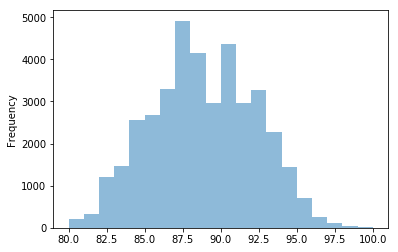

In [8]:
wine_drop['points'].plot.hist(alpha=0.5,bins=20)
plt.show()

price数据的直方图

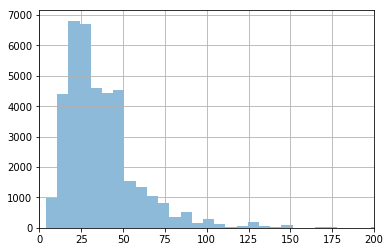

In [9]:
plt.xlim(0,200)
wine_drop['price'].hist(alpha=0.5,bins=300)
plt.show()

points的盒图

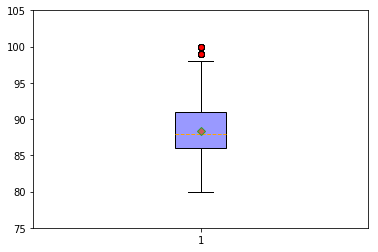

In [10]:
plt.boxplot(x = wine_drop['points'], # 指定绘图数据
            patch_artist=True, # 要求用自定义颜色填充盒形图，默认白色填充
            showmeans=True, # 以点的形式显示均值
            boxprops = {'color':'black','facecolor':'#9999ff'}, # 设置箱体属性，填充色和边框色
            flierprops = {'marker':'o','markerfacecolor':'red','color':'black'}, # 设置异常值属性，点的形状、填充色和边框色
            meanprops = {'marker':'D','markerfacecolor':'indianred'}, # 设置均值点的属性，点的形状、填充色
            medianprops = {'linestyle':'--','color':'orange'}) # 设置中位数线的属性，线的类型和颜色
# 设置y轴的范围
plt.ylim(75,105)
plt.tick_params(top='off', right='off')
plt.show()

price数据的盒图

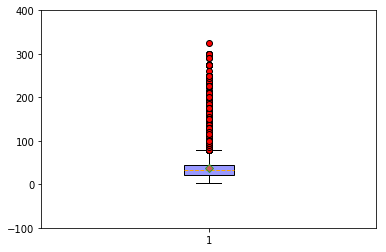

In [11]:
plt.boxplot(x = wine_drop['price'], # 指定绘图数据
            patch_artist=True, # 要求用自定义颜色填充盒形图，默认白色填充
            showmeans=True, # 以点的形式显示均值
            boxprops = {'color':'black','facecolor':'#9999ff'}, # 设置箱体属性，填充色和边框色
            flierprops = {'marker':'o','markerfacecolor':'red','color':'black'}, # 设置异常值属性，点的形状、填充色和边框色
            meanprops = {'marker':'D','markerfacecolor':'indianred'}, # 设置均值点的属性，点的形状、填充色
            medianprops = {'linestyle':'--','color':'orange'}) # 设置中位数线的属性，线的类型和颜色
# 设置y轴的范围
plt.ylim(75,105)
plt.tick_params(top='off', right='off')
plt.ylim(-100,400)
plt.tick_params(top='off', right='off')
plt.show()
plt.show()

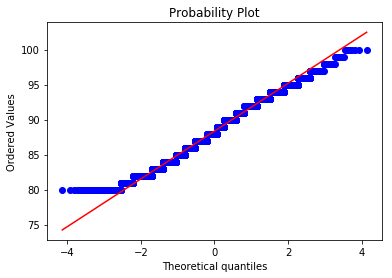

In [12]:
stats.probplot(wine_drop['points'],dist='norm',plot=plt)
plt.show()

我们做除了[points]的累计分布图，并根据累计分布图做出了[points]的QQ图。 QQ图是一种散点图，对应于正态分布的QQ图，就是由标准正态分布的分位数为横坐标，样本值为纵坐标的散点图，QQ图用于鉴别样本数据是否近似于正态分布，如果QQ图上的点是否近似地在一条直线附近，图形是直线说明是正态分布，而且该直线的斜率为标准差，截距为均值。 根据QQ图的绘制结果我们发现[points]的QQ图几乎在一条直线上，说明[points]的分布基本符合正态分布。

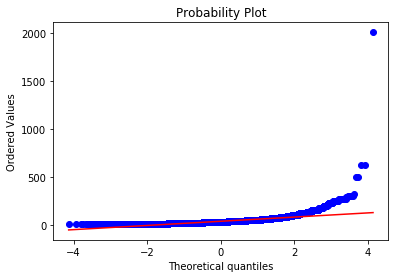

In [13]:
stats.probplot(wine_drop['price'],dist='norm',plot=plt)
plt.show()

接着我们做除了[price]的累计分布图，并根据累计分布图做出了[price]的QQ图。 QQ图是一种散点图，对应于正态分布的QQ图，就是由标准正态分布的分位数为横坐标，样本值为纵坐标的散点图，QQ图用于鉴别样本数据是否近似于正态分布，如果QQ图上的点是否近似地在一条直线附近，图形是直线说明是正态分布，而且该直线的斜率为标准差，截距为均值。 根据QQ图的绘制结果我们发现[points]的QQ图因为存在很多大的离群值，所以不满足正态分布，但是我们发现除去大于500的点之后，剩下的点几乎在一条直线上，说明在0-500的区间内[points]符合正态分布。

## 2 数据缺失的处理
根据第一部分的统计，我们发现在[price]属性中存在着13695条数据缺失记录。通过分析我们发现这些缺失值大多都是固定地区的评分较低的葡萄酒的价格数据，因此这些数据可能是因为这些葡萄酒的数据因为销量太少而被忽略。 针对缺失的数据我们采用四种方法来进行处理:

第一种是删除缺失数据；

第二种是用最高频率值来填补缺失值；

第三种是通过属性的相关关系来填补缺失值；

第四种是通过数据对象之间的相似性来填补缺失值。

### 2.1 删除缺失数据
这一步我们已经在最初数据处理过程中完成
### 2.2 用最高频率值来填补缺失数据
在这里 我们选择利用每一列的众数来填充本列缺失值

In [16]:
wines_mode=wines.copy()
for name in wines_mode.columns:
    if (name not in ['description', 'Unnamed: 0']):
        #print(wines[name].mode()[0])
        wines_mode[name].fillna(value=wines[name].mode()[0],inplace=True)


用最高频率值来填补缺失数据可视化

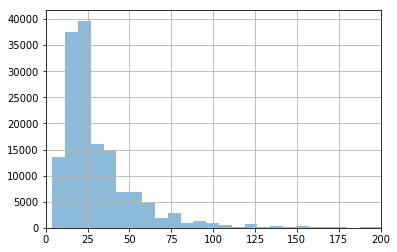

In [17]:
plt.xlim(0,200)
wines_mode['price'].hist(alpha=0.5,bins=300)
plt.show()

### 2.3通过属性相关关系来填补缺失值
葡萄酒的价格与葡萄酒的评分有关。在这里，我们选择利用两个属性之间的相关关系进行预测。（受于篇幅，在这里仅填补prices的缺失数据）

In [18]:
wines_col=wines.copy()
wines_col['price'].fillna(value=-10,inplace=True)
for l in range(len(wines_col['price'])):
    if wines_col.ix[l,'price']==-10:
        #rint(wines.ix[l,'price'])
        #print(wines_col.ix[l,'points'])
        tm=wines_col[wines_col['points']==wines_col.ix[l,'points']]
        wines_col.ix[l, 'price']=tm['points'].mode()[0]
        #print(tm)



F:\Users\wwwec\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  after removing the cwd from sys.path.


通过属性相关关系来填补缺失值的可视化结果

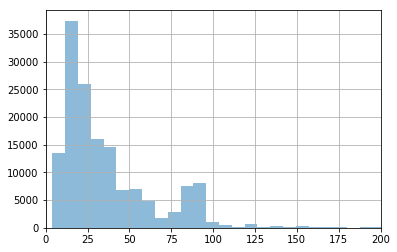

In [20]:
plt.xlim(0,200)
wines_col['price'].hist(alpha=0.5,bins=300)
plt.show()

### 2.4 通过对象之间的相似性填补缺失值
在这里我们认为：区域相同，位置相同的白酒 价格是相似的，我们以此为依据进行缺失值的填补，

In [21]:

wines_obj=wines.copy()
for l in range(len(wines_obj['price'])):
    if wines_obj.ix[l,'price']==-10:
        #print(wines.ix[l,'price'])

        tm=wines_obj[wines_obj.country==wines_obj.ix[l,'country']&wines_obj.province==wines_obj.ix[l,'province']&wine_obj.region_1==wines_obj.ix[l,'region_1']&ine_obj.region_1==wines_obj.ix[l,'region_2']]
        wines_obj.ix[l, 'price']=tm['points'].mode()[0]


F:\Users\wwwec\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  after removing the cwd from sys.path.


通过对象之间相似性填补缺失值

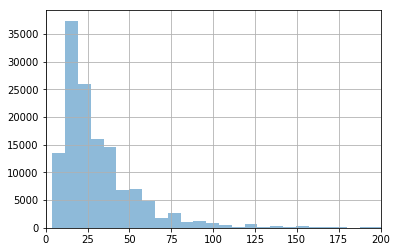

In [23]:
plt.xlim(0,200)
wines_obj['price'].hist(alpha=0.5,bins=300)
plt.show()